# First approach on ideal modelling



1. Implementing all necessary packages

100.0
1.0
10.0
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 2.7201305 seconds ----------------
------------- Initialization and postprocessing took 0.0028179 seconds----------------
100.00000149011612
1.0
10.0
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 2.0474378 seconds ----------------
------------- Initialization and postprocessing took 0.0025077 seconds----------------
100.0
1.0000000149011612
10.0
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 1.4457496 seconds ----------------
------------- Initialization and postprocessing took 0.0023113 seconds----------------
100.0
1.0
10.000000149011612
------------- Initialization and postprocessing -------

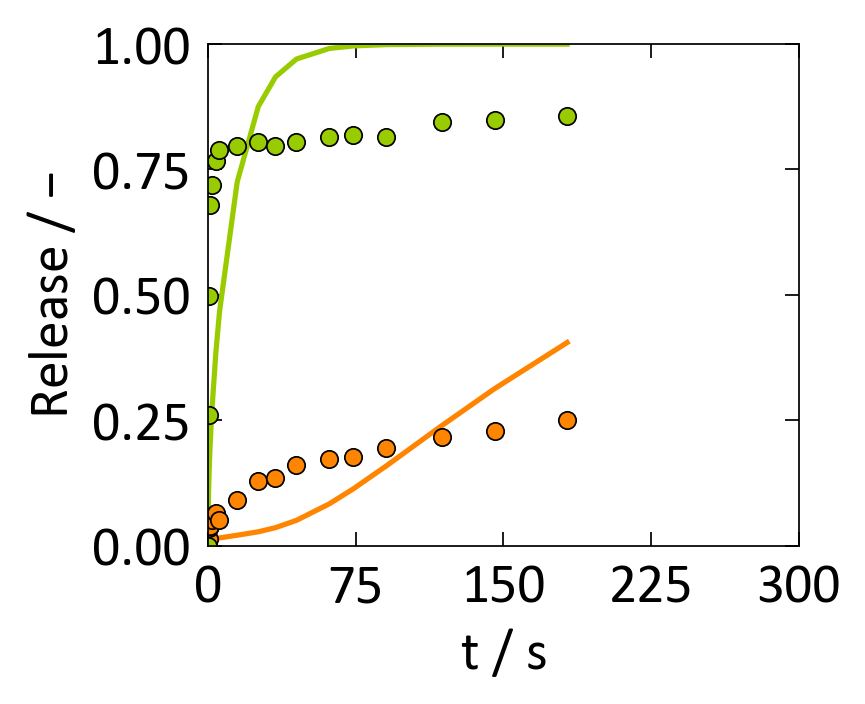

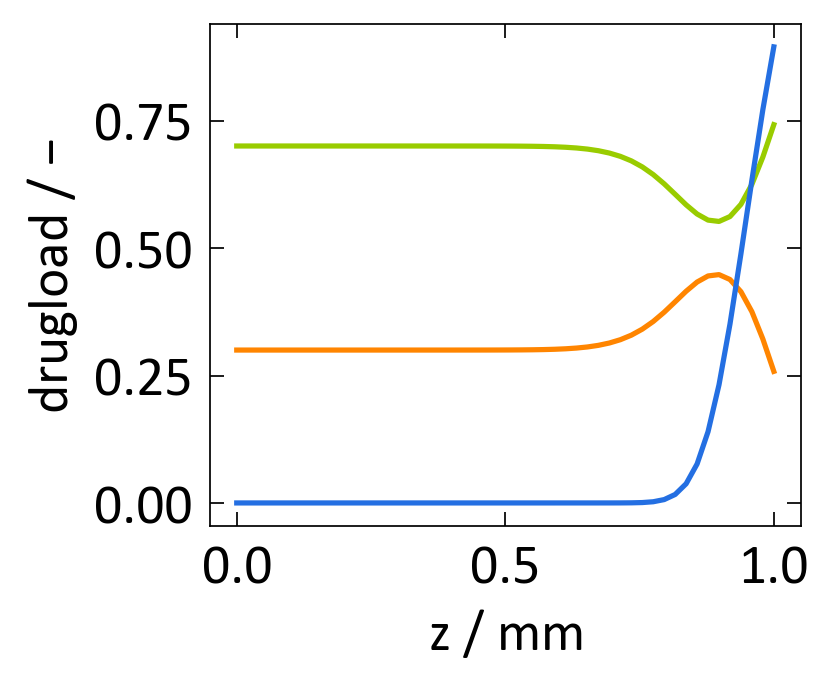

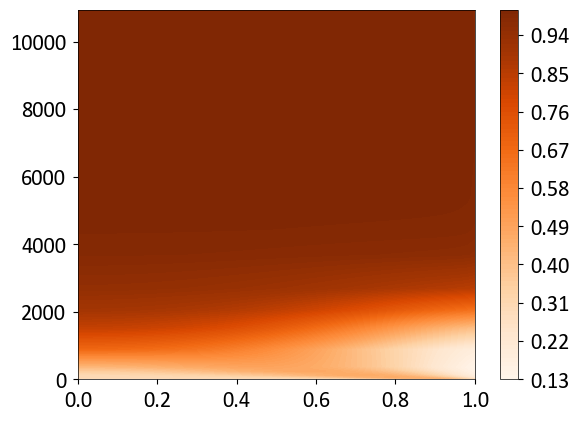

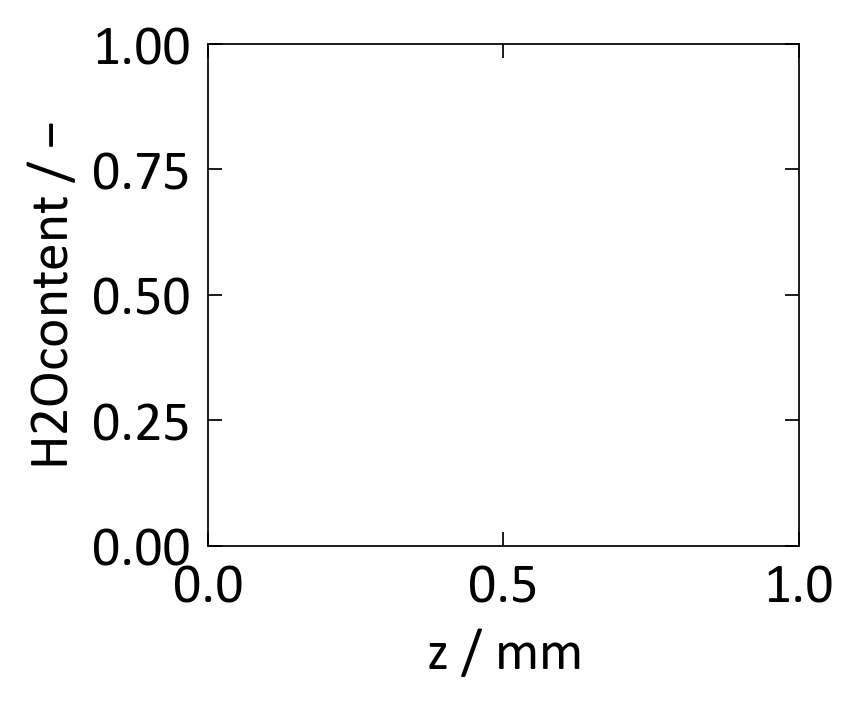

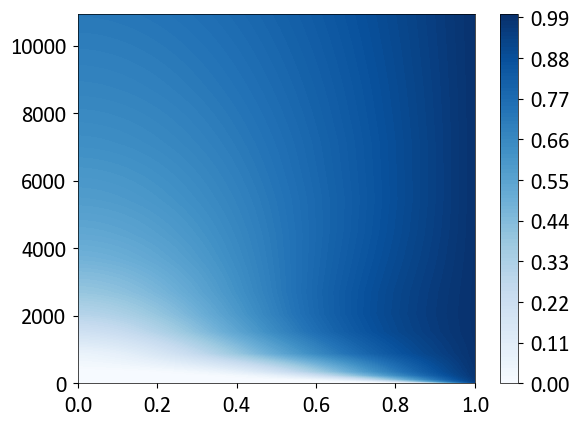

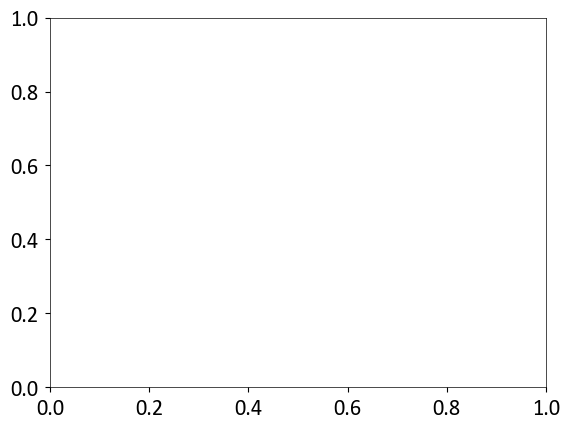

In [1]:
import numpy as np
from numpy import array
import scipy as sp
from diffusionpy import Diffusion_MS, origin_like
import matplotlib.pyplot as plt
plt.rcdefaults()
from scipy.optimize import curve_fit
import xlwings as xw
import pandas as pd



wINDL1D01=array([0,62.33766234,78.35497835,90.04329004,93.50649351,95.67099567,96.53679654,99.13419913,100.4329004])/100
wPolL1D01=array([0,67.0995671,82.25108225,93.07359307,96.53679654,98.26839827,98.26839827,100.4329004,100])/100

wINDL1D03=array([0,3.03030303,7.792207792,15.15151515,31.6017316,44.58874459,47.61904762,51.08225108,52.38095238,55.84415584,58.44155844,61.03896104,61.47186147])/100
wPolL1D03=array([0,27.27272727,46.75324675,56.70995671,77.92207792,90.47619048,90.04329004,91.34199134,91.34199134,91.77489177,91.77489177,91.34199134,90.47619048])/100

wINDL1D05=array([0,1.298701299,3.463203463,3.896103896,5.194805195,6.493506494,5.194805195,9.090909091,12.98701299,13.41991342,16.01731602,17.31601732,17.74891775,19.48051948,21.64502165,22.94372294,25.10822511])/100
wPolL1D05=array([0,25.97402597,49.78354978,67.96536797,71.86147186,76.62337662,78.78787879,79.65367965,80.51948052,79.65367965,80.51948052,81.38528139,81.81818182,81.38528139,84.41558442,84.84848485,85.71428571])/100


Mi= np.asarray([720.948,65000,18.02])
mobile= np.asarray([True,True,True])
# wi_8 =np.asarray([0.02,0.18,0.8]) #DL 01
# wi_8 =np.asarray([0.08,0.12,0.8]) #DL 02
# wi_8 =np.asarray([0.02,0.18,0.8]) #DL 03
wi_8 =np.asarray([0.0001,0.0001,0.9998]) 
Dvec =np.asarray([1E-12,2E-12,8E-12])





def plot_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD):
    # wH2O_ASD=1-wH2O_ASD/wH2O_ASD[0]
    plt.plot(texp, wAPI_ASD,'ro')
    plt.plot(texp,wPol_ASD,'go')
    # plt.plot(texp,wH2O_ASD,'bo')
    # plt.plot(texp,wges_ASD,'yo')


    
    plt.xlabel("t [s]")
    plt.ylabel("wi [-]")

def fit_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD):
    def funcline(x,a,b):
        return a*x+b
    def funcquad(x,a,b,c):
        return a*x**2+b*x+c
    # popt_API, pcov_API= curve_fit(funcline,texp,wAPI_ASD)
    # plt.plot(texp,funcline(texp,*popt_API),'r-')
    # qopt_API, qcov_API= curve_fit(funcline,texp,wAPI_ASD)
    # plt.plot(texp,funcline(texp,*qopt_API),'r--')
    # popt_Pol, pcov_Pol= curve_fit(funcline,texp,wPol_ASD)
    # plt.plot(texp,funcline(texp,*popt_Pol),'g-')
    # qopt_Pol, qcov_Pol= curve_fit(funcline,texp,wPol_ASD)
    # plt.plot(texp,funcline(texp,*qopt_Pol),'g--')
    # popt_H2O, pcov_H2O= curve_fit(funcline,texp,wH2O_ASD)
    # plt.plot(texp,funcline(texp,*popt_H2O),'b-')
    # qopt_H2O, qcov_H2O= curve_fit(funcline,texp,wH2O_ASD)
    # plt.plot(texp,funcline(texp,*qopt_H2O),'b--')
  #  MSopt, MScov = curve_fit(Diffusion_MS,texp,wAPI_ASD)
  #  plt.plot(texp,Diffusion_MS(texp,*MSopt),'r*')
    
def Choose_ASD(ASD_L,ASD_DL):
    if  ASD_DL == 0.1:
        wIND = wINDL1D01
        w0IND = 0.1
        wPol = wPolL1D01
        wH2O = 1
        mASD = 1
        wi_0 = np.asarray([0.0999,0.8999,0.0002])
        texp=array([0.,20.59327837,39.63138188,60.85744643,91.36593726,117.1190257,179.8464877,246.6930206,608.5744643])
    elif  ASD_DL ==0.2:
        wIND = wINDL1D03
        w0IND = 0.3
        wPol = wPolL1D03
        wH2O = 1
        mASD = 1
        wi_0 = np.asarray([0.1999,0.7999,0.0002])
        texp=array([0.,19.68419447,42.40831142,59.49901881,119.7929811,241.18647,354.013324,594.9901881,893.265153,1501.310729,2059.327837,2700.054616,3620.95835])
    elif ASD_DL == 0.3:
        wIND = wINDL1D05
        w0IND = 0.5
        wPol = wPolL1D05
        wH2O = 1
        mASD = 1
        wi_0 = np.asarray([0.2999,0.6999,0.0002])
        texp=array([0.,19.24481433,39.63138188,62.24688844,117.1190257,241.18647,354.013324,893.265153,1535.587293,2059.327837,2700.054616,3703.628786,4436.687331,5436.18362,7127.564834,8733.261624,10944.99799])
    else: print("Bitte gültige Werte für Länge und Drugload eingeben")
    w0Pol = 1 - w0IND  
    L = ASD_L * 10E-4 
    

    wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD=wIND,wPol,wH2O,mASD

    t=texp
    #fit_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD)
    # wt=Diffusion_MS(t,L,Dvec,wi_0,wi_8,Mi,mobile)
    # wt= Diffusion_MS(t,L,Dvec,wi_0,wi_8,Mi,mobile)
    def fit_Diff_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD):
        def Diffforfit(t,D1,D2,D3):
            Dscale=1E11 #Hilfsvariable
            # D1=1 #Dl07
            # D1=10 #Dl03
            # D1=800 #Dl05
            Dvec=np.asarray([D1,D2,D3])/Dscale #Normieren der Diffusionskoeffs (DKs)
            
            # Dvec=np.fmax(Dvec,1E-16)
            print(D1) #Ausgeben der normierten DKs
            print(D2)
            print(D3)
            wt,wtz,_,_=Diffusion_MS(t,L,Dvec,wi_0,wi_8,Mi,mobile,full_output=True,nz=50)
            wt=1-wt/wt[0,:]
            return np.hstack((wt[:,0],wt[:,1])) #Rückgabe von wAPI_ASD und wPol_ASD
        wexp=np.hstack((wAPI_ASD,wPol_ASD)) #Zusammenfügen zu einem Array
        Dscale=1E11
        qopt_H2O, qcov_H2O= curve_fit(Diffforfit,texp,wexp,bounds=(1E-4,1E6),p0=(100,1,10)) #Einsetzen von normierten DKs in Solver
        # qopt_H2O[0]=1
        # qopt_H2O[0]=10
        # qopt_H2O[0]=800
        Dvecopt=qopt_H2O/Dscale #Zurückskalieren der optimierten DKs in Array
        # Dvecopt=np.asarray([1.078000000e-11, 6.76785410e-12, 1.77526389e-11])
        print(Dvecopt)
        

        return Dvecopt
        
        

        
    Dvecopt=  fit_Diff_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD) #Aufrufen der Fit- Funktion  #np.array([1E-8,1E-12,1E-8]) 
    wt,wtz,_,_=Diffusion_MS(t,L,Dvecopt,wi_0,wi_8,Mi,mobile,full_output=True,nz=50) #Aufrufen der Diffusionsgleichung mit optimierten Dks
    DL_z= wtz[:,0,:]/(wtz[:,0,:]+wtz[:,1,:])
    wwz=wtz[:,2,:]
    return wt, Dvecopt, wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD, DL_z,wwz,t





def Plot_Fit (ASD_L,DL):
    list1 =[]
    wt,b,wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD, DL_z,wwz,t= Choose_ASD(ASD_L,DL)
    texp=t
    wt=1-wt/wt[0,:]
    fig10,ax10=origin_like.subplots()

    origin_like.plot(ax10,t/60,wt[:,0],"r-")
    origin_like.plot(ax10,t/60,wt[:,1],"g-")

   
    
    origin_like.set_xlabel(ax10,"t","s")
    origin_like.set_ylabel(ax10,"Release","-")
    origin_like.set_ticks(ax10,0,300,0,1)
    # wH2O_ASD=1-wH2O_ASD/wH2O_ASD[0]
    origin_like.plot(ax10,texp/60, wAPI_ASD,"ro")
    origin_like.plot(ax10,texp/60,wPol_ASD,"go")
    # plt.plot(t,wt[:,0],'r-') #Plotten der angepassten Kurven
    # plt.plot(t,wt[:,1],'g-')
    # plt.plot(t,wt[:,2],'b-')



    # plot_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD)
    xDL =np.linspace(0.3,0.7,3)
   # for D in xDL:
    #     wt,b,wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD,DL_z= Choose_ASD(ASD_L,D)
    #     list1.append(b)
    #Dvec_array= np.array(list1)
    #fig,axis =plt.subplots()
    #axis.plot(xDL,Dvec_array[0,:],'r*')
    #axis.plot(xDL,Dvec_array[1,:],'g*')
    #axis.plot(xDL,Dvec_array[2,:],'b*')
    #wt,b,wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD, DL_z= Choose_ASD(ASD_L,DL)
    fig,ax =origin_like.subplots()
    fig1,ax1 =plt.subplots()
    fig2,ax2 =origin_like.subplots()
    fig3,ax3 =plt.subplots()
    fig4,ax4 =plt.subplots()
    z= np.linspace(0,ASD_L,50)
    X,Z=np.meshgrid(z,t)
    # origin_like.plot(ax,z,DL_z[0,0:-1],'r-')
    # origin_like.plot(ax,z,DL_z[19,0:-1],'r-')
    # origin_like.plot(ax,z,DL_z[39,0:-1],'r-')
    # origin_like.plot(ax,z,DL_z[59,0:-1],'r-')
    origin_like.plot(ax,z,DL_z[1,0:-1],'r-')
    origin_like.plot(ax,z,1-DL_z[1,0:-1],'g-')
    # origin_like.plot(ax2,z,wwz[0,0:-1],'b-')
    # origin_like.plot(ax2,z,wwz[19,0:-1],'b-')
    # origin_like.plot(ax2,z,wwz[39,0:-1],'b-')
    # origin_like.plot(ax2,z,wwz[59,0:-1],'b-')
    origin_like.plot(ax,z,wwz[1,0:-1],'b-')
    # fig.savefig('filename.png', format='png', dpi='600', transparent=True)
    # ax2.plot(z,wwz[99,0:-1],'g-',label ='t = 22500s')
    
    cf=ax1.contourf(X,Z,DL_z[:,0:-1],cmap="Oranges",levels=100)
    # cp=ax1.contour(X,Z,DL_z[:,0:-1][None,:]*np.ones((50,50)),colors='black',levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9])
    # cp.clabel(levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9], fontsize=14,inline_spacing=0)
    cf2=ax3.contourf(X,Z,wwz[:,0:-1],cmap="Blues",vmin=0,vmax=1,levels=100)
    # cp2=ax3.contour(X,Z,wwz[-1,0:-1][None,:]*np.ones((50,50)),colors='black',levels=[0,0.05,0.15,0.2,0.3,0.4,0.5,0.6,0.8])
    # cp2.clabel(levels=[0,0.05,0.15,0.2,0.3,0.4,0.5,0.6,0.8], fontsize=14,inline_spacing=0)
    # cf3=ax4.contourf(X,Z,(1-DL_z[-1,0:-1][None,:]*np.ones((50,50))),cmap="Greens",levels=100)
    # cp3=ax4.contour(X,Z,(1-DL_z[-1,0:-1][None,:]*np.ones((50,50))),colors='black',levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9])
    # cp3.clabel(levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9], fontsize=14,inline_spacing=0)
    fig1.colorbar(cf)
    fig3.colorbar(cf2)
    # fig3.colorbar(cf3)
    origin_like.set_xlabel(ax,"z","mm")
    origin_like.set_ylabel(ax,"drugload","-")
    origin_like.set_xlabel(ax2,"z","mm")
    origin_like.set_ylabel(ax2,"H2O content","-")
    # ax.set_xlabel('z [mm]')
    # ax.set_ylabel('drugload')
    # ax.legend()
   
  

    



    
#Choose_ASD(1,0.7)
Plot_Fit (1,0.3)
#Export_to_Excel(1,0.5)



Fitting the sorption Data und Calculation of the Sorption MS Coefficients